In [1]:
#Load the Etherscan 'cerebrumdao_transfers' data

import pandas as pd

df = pd.read_csv('cerebrumdao_transfers.csv')
df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,22458932,2025-05-11 08:32:59,0xeba706ae11b090787d71c02c6002001c7ef1277e225b...,302162,0x93f90cc0c72bebf806f5a27555ea90799386ceb50e0b...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3.890462e-30,Cerebrum DAO Token,NEURON,18,4,1622211,4705300145,1135548,4343560,deprecated,738
1,22458757,2025-05-11 07:57:35,0xa759af949c90b966190500da77928576d56cbec976f4...,332304,0x086bf98ba52923ff135125e2bc18849b329454540360...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3.476359e-30,Cerebrum DAO Token,NEURON,18,135,295632,3221202720,206943,13147996,deprecated,913
2,22458652,2025-05-11 07:36:23,0x81554f52712cce1c0d4bcf42405cb58194b8334fe156...,302123,0xb1bbe5b84403fcb1214093deb677ac1ca9f4281691a0...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,4.037819e-30,Cerebrum DAO Token,NEURON,18,51,294227,4438196303,205959,8137469,deprecated,1018
3,22458264,2025-05-11 06:17:59,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...,16,0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x2e5ca1bbaec313db05de9337356517cad2f59811,3.355221e-32,Cerebrum DAO Token,NEURON,18,166,330517,3552028227,248076,15857938,deprecated,1406
4,22458264,2025-05-11 06:17:59,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...,16,0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x74de5d4fcbf63e00296fd95d33236b9794016631,3.355221e-32,Cerebrum DAO Token,NEURON,18,166,330517,3552028227,248076,15857938,deprecated,1406


In [2]:
# Basic Data Overview
# >> How many transfers?
# >> Date range of data?
# >> How many unique addresses involved?

print("Total transfers:", len(df))
print("Date range:", df['timeStamp'].min(), "to", df['timeStamp'].max())
print("Unique sender addresses:", df['from'].nunique())
print("Unique recipient addresses:", df['to'].nunique())

Total transfers: 8207
Date range: 2024-03-16 13:09:23 to 2025-05-11 08:32:59
Unique sender addresses: 1148
Unique recipient addresses: 1899


In [ ]:
# ANALYZE KEY KPIs

In [ ]:
# Token Distribution (Decentralization)
# >> How many unique holders?
# >> Are tokens concentrated in a few wallets?

In [3]:
# Calculate current balances for each address
from collections import defaultdict

balances = defaultdict(float)
for _, row in df.iterrows():
    balances[row['to']] += row['value']
    balances[row['from']] -= row['value']

balances_df = pd.DataFrame(list(balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0].sort_values('balance', ascending=False)
balances_df.head(10)

,address,balance
10,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,4.108777e-26
19,0xafb979d9afad1ad27c5eff4e27226e3ab9e5dcc9,1.292393e-26
49,0x7cc7e125d83a581ff438608490cc0f7bdff79127,8.647428e-27
1582,0xd9c6ee1547fd6d48f8872dd866473893bbe8a1ab,3.946814e-27
427,0x304d8ae7c56fa221b4808004e33255900215295d,3.095324e-27
1278,0x2a9a57e9971980f6043d74c2d0ecd7abc5e2a834,2.068052e-27
0,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,1.449798e-27
1,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,1.112203e-27
395,0x71028407594d438a5f718972228538d0002c6d7f,1.027437e-27
35,0x3154cf16ccdb4c6d922629664174b904d80f2c35,9.036236e-28


In [4]:
# Top 10 holders’ share of total supply.

total_supply = balances_df['balance'].sum()
top_10_share = balances_df.head(10)['balance'].sum() / total_supply * 100
print(f"Top 10 holders own {top_10_share:.2f}% of total supply")

Top 10 holders own 88.68% of total supply


In [13]:
# debug timeStamp format. Index was already set no need to further changes
print(df.columns)
print(df.index.name)

Index(['blockNumber', 'hash', 'nonce', 'blockHash', 'from', 'contractAddress',
       'to', 'value', 'tokenName', 'tokenSymbol', 'tokenDecimal',
       'transactionIndex', 'gas', 'gasPrice', 'gasUsed', 'cumulativeGasUsed',
       'input', 'confirmations'],
      dtype='object')
timeStamp


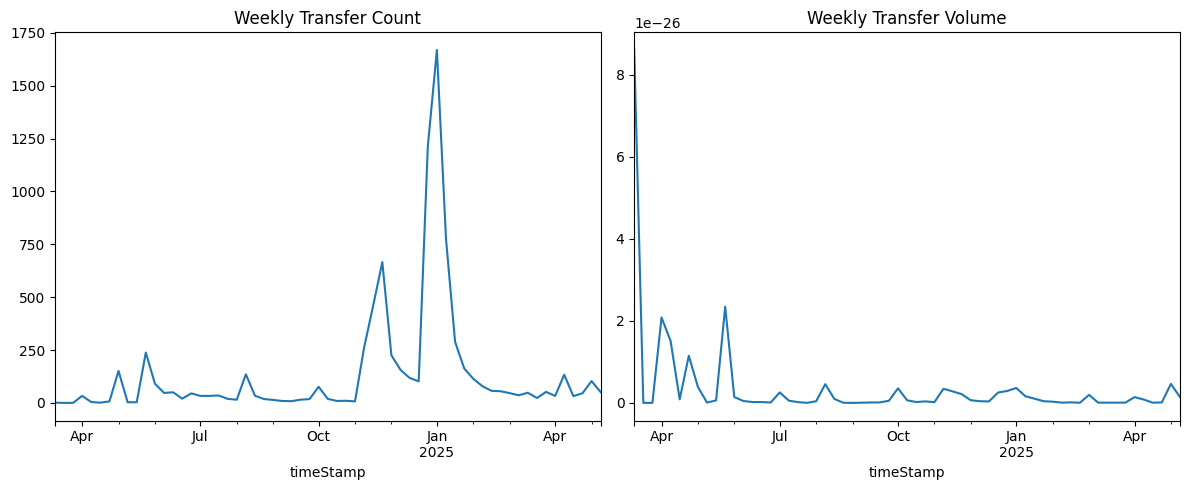

In [19]:
# Activity Over Time
# >> Are transfers increasing, steady, or declining?
# >> KPI: Weekly/monthly transfer count and volume.

#If your index is a string that looks like a date, use pd.to_datetime(df.index) (no unit='s').
#Only use unit='s' if your data is in UNIX timestamp format (numbers).


df.index = pd.to_datetime(df.index)
weekly_transfers = df.resample('W').size()
weekly_volume = df.resample('W')['value'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
weekly_transfers.plot(title='Weekly Transfer Count')
plt.subplot(1,2,2)
weekly_volume.plot(title='Weekly Transfer Volume')
plt.tight_layout()
plt.show()

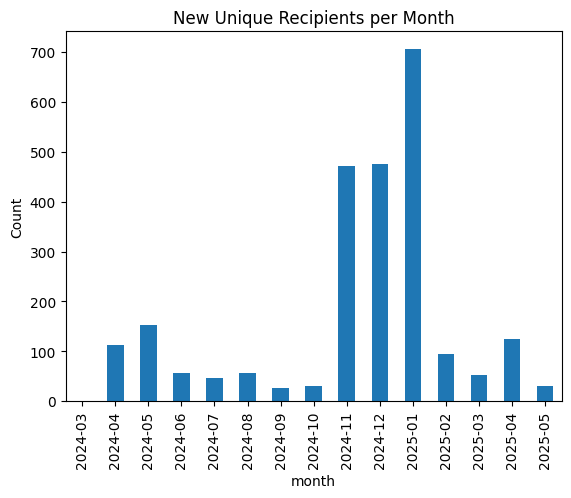

In [20]:
# Holder Churn and Engagement
# >> How many new addresses receive tokens each month?
# >> KPI: New unique recipients per month.

df['month'] = df.index.to_period('M')
new_recipients = df.groupby('month')['to'].nunique()
new_recipients.plot(kind='bar', title='New Unique Recipients per Month')
plt.ylabel('Count')
plt.show()

In [21]:
# Large Transactions (Whale Activity)
# >> Are there big transfers?
# >> KPI: Number and size of transfers above a threshold (e.g., 1% of total supply).

large_tx_threshold = total_supply * 0.01
large_txs = df[df['value'] > large_tx_threshold]
print("Number of large transfers:", len(large_txs))
display(large_txs[['from', 'to', 'value', 'hash']])

Number of large transfers: 30


,from,to,value,hash
timeStamp,,,,
2025-04-28 20:17:23,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,1.213015e-27,0xd63a3d06971e179d3b51961d1aa9091c7e9890458ae7...
2025-03-02 16:06:47,0x3962f6585946823440d274ad7c719b02b49de51e,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,8.600000e-28,0x26dae8823ce70b425d1afd4af7fccc12a993ad044252...
2024-12-19 08:21:35,0x2a9a57e9971980f6043d74c2d0ecd7abc5e2a834,0xb02dc3125aa7f6318f31a094b7c3bc210a0dcbb3,1.100000e-27,0xd67102bc1cb815bec206222183a67e5d93cd37a83242...
2024-11-10 22:43:47,0xc36442b4a4522e871399cd717abdd847ab11fe88,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,9.000000e-28,0x7f1ac4fd0a8a1797bbdabde267276c544cf8699d4cc3...
2024-11-10 22:43:47,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,0xc36442b4a4522e871399cd717abdd847ab11fe88,9.000000e-28,0x7f1ac4fd0a8a1797bbdabde267276c544cf8699d4cc3...
2024-10-06 17:29:35,0xb5ec9706c3be9d22326d208f491e5deef7c8d9f0,0x3962f6585946823440d274ad7c719b02b49de51e,8.600000e-28,0xfcd827656bc8b9730a37b7767b076ab2a88b2f228842...
2024-10-06 17:29:35,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,0xb5ec9706c3be9d22326d208f491e5deef7c8d9f0,8.600000e-28,0xfcd827656bc8b9730a37b7767b076ab2a88b2f228842...
2024-07-05 13:31:59,0xea07ddbbea804e7fe66b958329f8fa5cda95bd55,0x7cc7e125d83a581ff438608490cc0f7bdff79127,9.772878e-28,0xf79da701682882820118dcc246bac2374880602615c9...
2024-07-05 13:31:59,0xb35d6796366b93188ad5a01f60c0ba45f1bdf11d,0xea07ddbbea804e7fe66b958329f8fa5cda95bd55,9.772878e-28,0xf79da701682882820118dcc246bac2374880602615c9...


In [22]:
# Dormant vs. Active Addresses
# >> How many addresses are active (sent/received in last 30 days)?

recent_cutoff = df.index.max() - pd.Timedelta(days=30)
recent_df = df[df.index > recent_cutoff]
active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())
print("Active addresses in last 30 days:", len(active_addresses))

Active addresses in last 30 days: 107


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_2096/2690235191.py:6: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())


In [25]:
# >> How many addresses are active (sent/received in last 90 days)?

recent_cutoff = df.index.max() - pd.Timedelta(days=90)
recent_df = df[df.index > recent_cutoff]
active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())
print("Active addresses in last 90 days:", len(active_addresses))

Active addresses in last 90 days: 316


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_2096/434855838.py:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())


In [ ]:
# Step 5: Interpret in Context of Mission
# >> If the mission is decentralization: High concentration in top wallets is a red flag.
# >> If the mission is community engagement: Low new recipient count or declining activity is a concern.
# >> If the mission is funding research: Look for transfers to known research addresses or grant disbursements.


# Step 6: Next Steps
# >> Visualize top holders (pie/bar chart).
# >> Analyze governance activity (if available).
# >> Compare on-chain activity to off-chain (Twitter, Discord) for holistic view.